## Importing Libraries

In [30]:
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Activation

## Data Preperation and Visualization

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

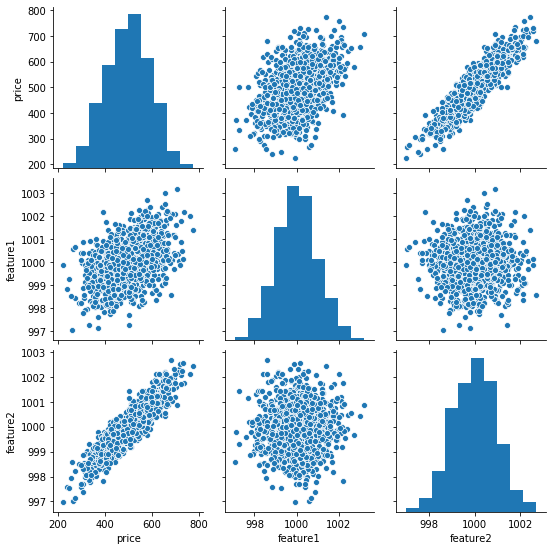

In [4]:
sns.pairplot(df)

In [5]:
X = df[['feature1','feature2']].values

In [6]:
y = df['price'].values

In [7]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

## Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
X_train = scaler.transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

## Neural Network

In [16]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Training

In [17]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
700/700 [==============================] - 2s 3ms/sample - loss: 256767.1876
Epoch 2/250
700/700 [==============================] - 0s 107us/sample - loss: 256653.3336
Epoch 3/250
700/700 [==============================] - 0s 98us/sample - loss: 256557.4054
Epoch 4/250
700/700 [==============================] - 0s 88us/sample - loss: 256441.0967
Epoch 5/250
700/700 [==============================] - 0s 93us/sample - loss: 256299.5562
Epoch 6/250
700/700 [==============================] - 0s 94us/sample - loss: 256147.2704
Epoch 7/250
700/700 [==============================] - 0s 91us/sample - loss: 255986.6038
Epoch 8/250
700/700 [==============================] - 0s 101us/sample - loss: 255812.7451
Epoch 9/250
700/700 [==============================] - 0s 93us/sample - loss: 255623.2229
Epoch 10/250
700/700 [==============================] - 0s 93us/sample - loss: 255415.0566
Epoch 11/250
700/700 [==============================] - 0s 93us/sample - loss: 255184.5539
Epoch 1

700/700 [==============================] - 0s 80us/sample - loss: 2107.1530
Epoch 92/250
700/700 [==============================] - 0s 93us/sample - loss: 2072.9540
Epoch 93/250
700/700 [==============================] - 0s 99us/sample - loss: 2039.0779
Epoch 94/250
700/700 [==============================] - 0s 101us/sample - loss: 2001.9999
Epoch 95/250
700/700 [==============================] - 0s 85us/sample - loss: 1966.4223
Epoch 96/250
700/700 [==============================] - 0s 90us/sample - loss: 1937.0632
Epoch 97/250
700/700 [==============================] - 0s 90us/sample - loss: 1903.5811
Epoch 98/250
700/700 [==============================] - 0s 94us/sample - loss: 1869.4494
Epoch 99/250
700/700 [==============================] - 0s 97us/sample - loss: 1837.9967
Epoch 100/250
700/700 [==============================] - 0s 94us/sample - loss: 1804.3485
Epoch 101/250
700/700 [==============================] - 0s 88us/sample - loss: 1769.8774
Epoch 102/250
700/700 [========

700/700 [==============================] - 0s 97us/sample - loss: 72.0139
Epoch 183/250
700/700 [==============================] - 0s 89us/sample - loss: 66.7233
Epoch 184/250
700/700 [==============================] - 0s 89us/sample - loss: 61.6040
Epoch 185/250
700/700 [==============================] - 0s 93us/sample - loss: 57.9196
Epoch 186/250
700/700 [==============================] - 0s 91us/sample - loss: 53.3686
Epoch 187/250
700/700 [==============================] - 0s 91us/sample - loss: 49.3819
Epoch 188/250
700/700 [==============================] - 0s 93us/sample - loss: 45.8542
Epoch 189/250
700/700 [==============================] - 0s 90us/sample - loss: 43.5522
Epoch 190/250
700/700 [==============================] - 0s 100us/sample - loss: 40.1574
Epoch 191/250
700/700 [==============================] - 0s 94us/sample - loss: 38.0027
Epoch 192/250
700/700 [==============================] - 0s 101us/sample - loss: 36.3095
Epoch 193/250
700/700 [=====================

In [18]:
loss_df = pd.DataFrame(model.history.history)

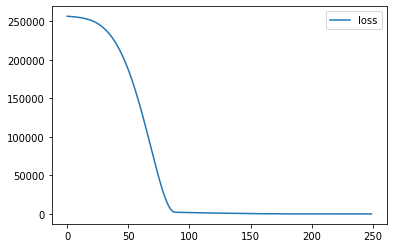

In [19]:
loss_df.plot()

In [20]:
model.evaluate(X_test,y_test,verbose=0)

25.239947306315106

In [21]:
model.evaluate(X_train,y_train,verbose=0)

23.740519659859793

In [22]:
test_pred = model.predict(X_test)

In [23]:
test_pred

array([[405.61514],
       [624.10455],
       [592.6681 ],
       [572.72144],
       [366.87387],
       [579.6918 ],
       [515.47363],
       [459.50223],
       [549.71564],
       [447.90375],
       [612.33844],
       [549.45416],
       [419.4386 ],
       [409.1932 ],
       [651.86395],
       [437.66714],
       [508.91223],
       [660.5147 ],
       [663.1821 ],
       [566.0491 ],
       [334.46198],
       [445.2012 ],
       [382.81726],
       [379.05252],
       [567.096  ],
       [611.12976],
       [532.8521 ],
       [428.21304],
       [656.0293 ],
       [414.4268 ],
       [443.01266],
       [485.54135],
       [438.77832],
       [682.466  ],
       [425.12155],
       [418.01462],
       [502.38654],
       [550.9626 ],
       [510.1541 ],
       [395.6476 ],
       [619.15674],
       [416.97397],
       [604.99835],
       [446.34848],
       [502.42056],
       [582.26324],
       [669.63696],
       [490.832  ],
       [318.82108],
       [485.8386 ],


In [24]:
test_Pred = pd.Series(test_pred.reshape(300,))
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [25]:
pred_df = pd.concat([pred_df,test_Pred],axis=1)

In [26]:
pred_df.columns = ['Test True Y','Model Predictions']

In [27]:
pred_df

Test True Y  Model Predictions
0     402.296319         405.615143
1     624.156198         624.104553
2     582.455066         592.668091
3     578.588606         572.721436
4     371.224104         366.873871
..           ...                ...
295   525.704657         529.494751
296   502.909473         515.735779
297   612.727910         610.204285
298   417.569725         417.305267
299   410.538250         411.197540

[300 rows x 2 columns]

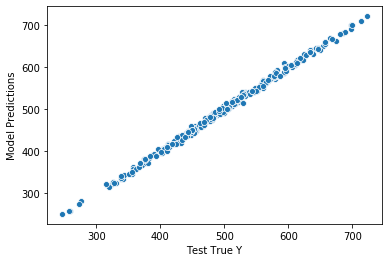

In [29]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [32]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.03602086936748

In [33]:
df.describe()

price     feature1     feature2
count  1000.000000  1000.000000  1000.000000
mean    498.673029  1000.014171   999.979847
std      93.785431     0.974018     0.948330
min     223.346793   997.058347   996.995651
25%     433.025732   999.332068   999.316106
50%     502.382117  1000.009915  1000.002243
75%     564.921588  1000.637580  1000.645380
max     774.407854  1003.207934  1002.666308

In [34]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

25.239950822215718

In [35]:
new_gem = [[998,1000]]

In [37]:
new_gem = scaler.transform(new_gem)

In [38]:
model.predict(new_gem)

array([[420.00406]], dtype=float32)

## Saving a model

In [40]:
from tensorflow.keras.models import load_model

In [41]:
model.save('my_gem_model.h5')

## Loading a model

In [45]:
later_model = load_model('my_gem_model.h5')

In [44]:
later_model.predict(new_gem)

array([[420.00406]], dtype=float32)